# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


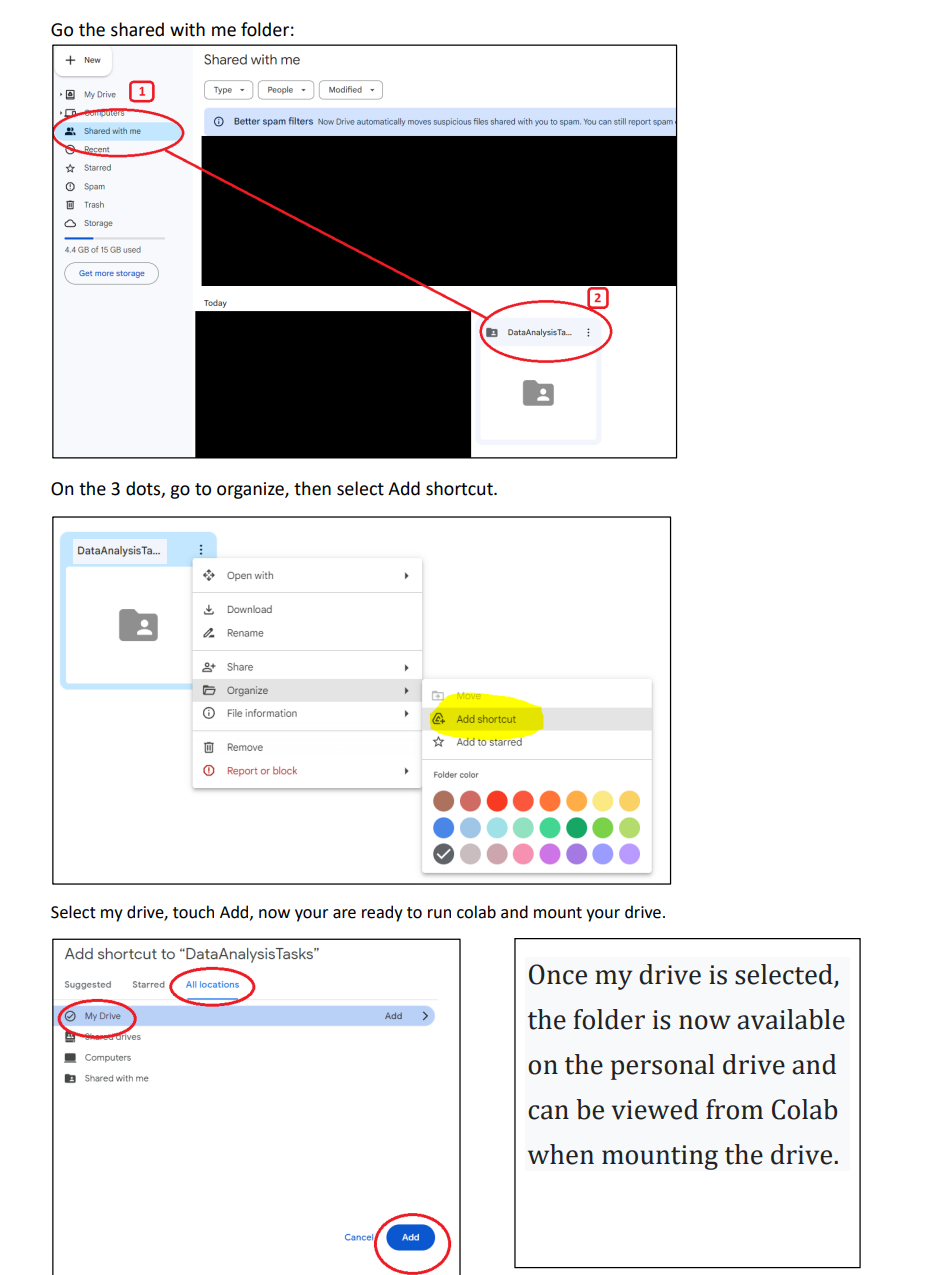

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/world_cups_data.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








I want a chart showing the Close, Bollinger Bands and its calculated SMA with a 3 month window and a standard deviation of 2, showing the last 24 months of the data set 'yahoo_stock.csv'.

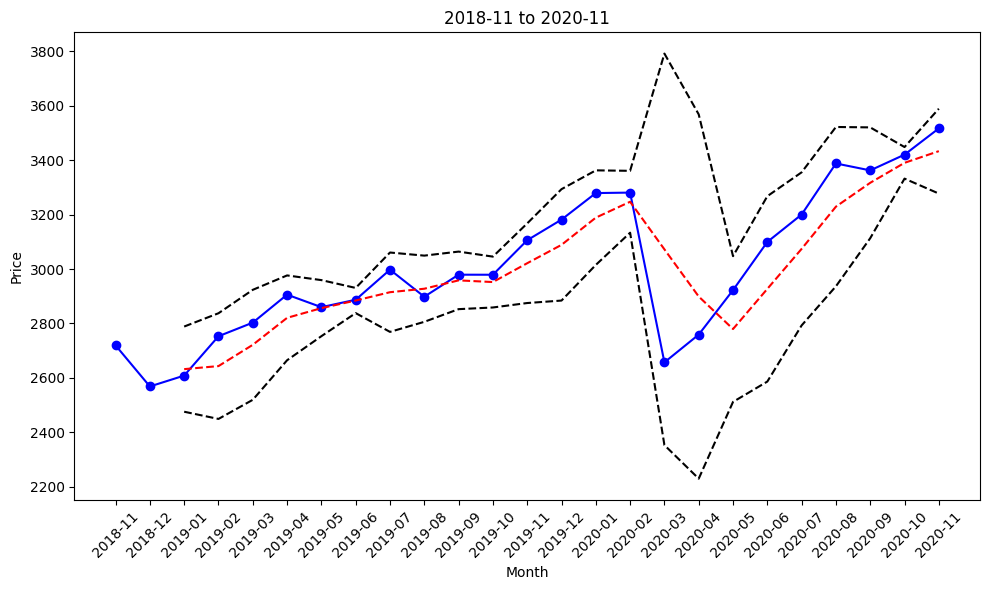

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Read dataset
try:
    df = pd.read_csv(
        "yahoo_stock.csv"
    )

except Exception as e:
    print(e)
    pass

# Cast to datatime
df["Date"] = pd.to_datetime(df["Date"])

# Create the monthly period
df["Month"] = df["Date"].dt.to_period("M")

# Group by month
df = df.groupby("Month")["Close"].mean().reset_index(name="Close")

# Max date
max_date = df["Month"].max()

# Filter date.
min_date = max_date - 12*2
df = df[ (df["Month"] >= min_date)]

# Ordered
df = df.sort_values(by=["Month"], ascending=True)

# Time window is defined
window=3

# The number of standard deviations is defined.
standard_deviations = 2

# SMA indicator
df['SMA'] = df['Close'].rolling(window=window).mean()

# Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['Close'].rolling(window=window).std() * standard_deviations)

# Lower Bollinger band
df['Lower'] = df['SMA'] - (df['Close'].rolling(window=window).std() * standard_deviations)

# Create Month_str field
df["Month_str"] = df["Month"].dt.strftime("%Y-%m")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Month_str'], df['Close'], marker='o', linestyle='-', color='blue', label='Close')
plt.plot(df['Month_str'], df['SMA'], linestyle='--', color='red', label='Upper Bollinger Band')
plt.plot(df['Month_str'], df['Upper'], linestyle='--', color='black', label='Upper Bollinger Band')
plt.plot(df['Month_str'], df['Lower'], linestyle='--', color='black', label='Lower Bollinger band')

plt.title(f"{min_date} to {max_date}")
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sure, I can help you with that, here is a chart showing the Close, Bollinger Bands and its SMA calculated with a 3 month window and a standard deviation of 2, showing the last 24 months:

[image of the query]

I hope it helps you!
